In [19]:
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('seaborn')

path = "coalbumps.csv"
data = pd.read_csv(path)
data = data.sample(frac=1)

categorical = ["SeismicHazard", "SeismoacousticHazard", "SeismicHazardAssessment", "ShiftType"]
for cats in categorical:
    try:
        dummed = pd.get_dummies(data[cats], prefix = cats)
        data = data.drop(cats, axis=1)
        data = data.join(dummed)
    except KeyError:
        pass

target = 'CurrentShiftHazard'
features = [feature for feature in list(data.head(0)) if feature != target]

X = data[features]
y = data[target]

scaler = StandardScaler()
scaler.fit(X)

X = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

ros = RandomOverSampler()
X_train, y_train = ros.fit_sample(X_train, y_train)



train_sizes = list(range(159,2067,159))

def tv_scores_mean(estimator, X, y, train_sizes, scoring='accuracy', shuffle=True, cv=5):
    train_sizes, train_scores, validation_scores = learning_curve(estimator = estimator, X=X, y=y, 
                                                                  train_sizes=train_sizes, scoring=scoring, 
                                                                  shuffle=shuffle, cv=cv)
    train_scores_mean = train_scores.mean(axis = 1)
    validation_scores_mean = validation_scores.mean(axis = 1)
    return train_sizes, train_scores_mean, validation_scores_mean


def plot_learning_curve(train_sizes, train_scores_mean, validation_scores_mean):
    plt.plot(train_sizes, train_scores_mean, label = 'Training F1')
    plt.plot(train_sizes, validation_scores_mean, label = 'Validation F1')
    plt.ylabel('F1', fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14)
    plt.title('Learning curves', fontsize = 18, y = 1.03)
    plt.legend()
    plt.ylim(0,1)



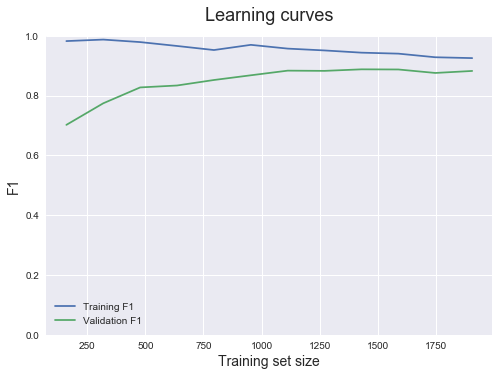

In [30]:
from sklearn.model_selection import learning_curve
from sklearn import tree

dtc_est = tree.DecisionTreeClassifier(max_depth=10)

plot_learning_curve(*tv_scores_mean(dtc_est,X_train,y_train,train_sizes))


C:\Users\gushi\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


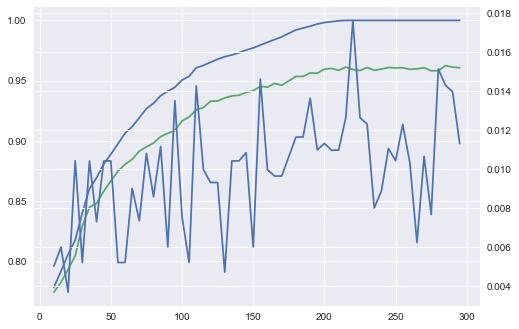

In [8]:
from sklearn import svm, model_selection


param_grid = {'max_leaf_nodes' : range(10,300,5)}

gridsearch = model_selection.GridSearchCV(estimator = tree.DecisionTreeClassifier(), param_grid = param_grid, scoring='f1')

gridsearch.fit(X,y)


"""print(gridsearch.cv_results_['mean_test_score'])
print(gridsearch.cv_results_['mean_train_score'])
print(gridsearch.cv_results_)"""

def plot_complexity_curve(hyperparameter_values, time_complexity, train_scores_mean, validation_scores_mean):
    """
    https://matplotlib.org/examples/api/two_scales.html
    """
    fig, ax1 = plt.subplots()
    ax1.plot(hyperparameter_values, train_scores_mean, label = 'Training F1')
    ax1.plot(hyperparameter_values, validation_scores_mean, label = 'Validation F1')
    ax2 = ax1.twinx()
    ax2.plot(hyperparameter_values, time_complexity, label = 'Time Complexity')

plot_complexity_curve(param_grid['max_leaf_nodes'], gridsearch.cv_results_['mean_fit_time'], gridsearch.cv_results_['mean_train_score'], gridsearch.cv_results_['mean_test_score'])

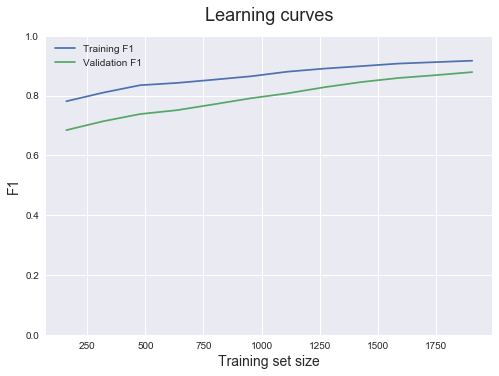

In [26]:
import sklearn

knn_est = sklearn.neighbors.KNeighborsClassifier()


plot_learning_curve(*tv_scores_mean(knn_est,X_train,y_train,train_sizes))

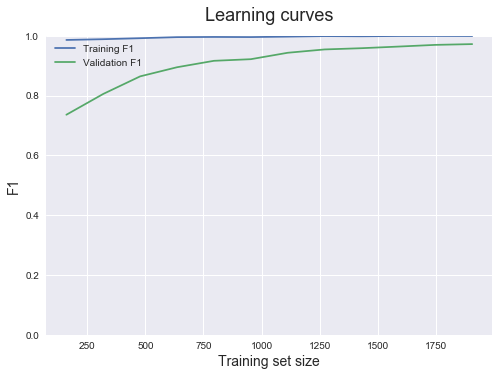

In [27]:
from sklearn.ensemble import RandomForestClassifier

rfc_est = RandomForestClassifier()

plot_learning_curve(*tv_scores_mean(rfc_est,X_train,y_train,train_sizes))

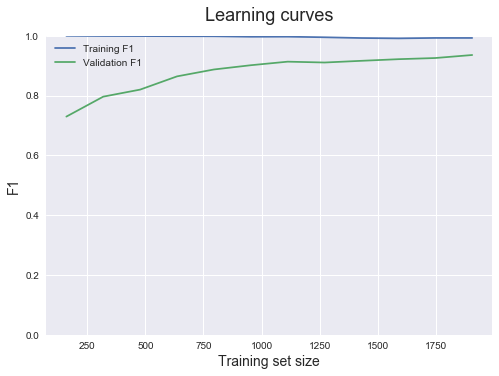

In [28]:
from sklearn.neural_network import MLPClassifier


mlp_est = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(30,30), random_state=1)


plot_learning_curve(*tv_scores_mean(mlp_est,X_train,y_train,train_sizes))

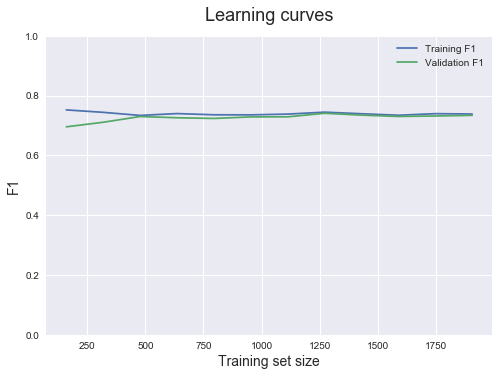

In [29]:
from sklearn import svm

svm_est = svm.SVC(kernel='linear', C=1, gamma=1)

plot_learning_curve(*tv_scores_mean(svm_est,X_train,y_train,train_sizes))

C:\Users\gushi\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


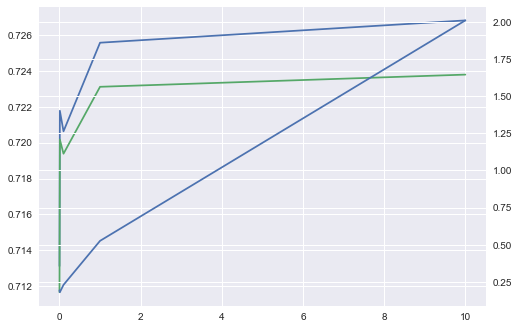

In [13]:
param_grid = {'C' : [0.001, 0.01, 0.1, 1, 10]}

gridsearch = model_selection.GridSearchCV(estimator = svm.SVC(kernel='linear', C=1, gamma=1, random_state=1), param_grid = param_grid, scoring='f1')

gridsearch.fit(X_scale,y)

plot_complexity_curve(param_grid['C'], gridsearch.cv_results_['mean_fit_time'], gridsearch.cv_results_['mean_train_score'], gridsearch.cv_results_['mean_test_score'])